<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning(기계 학습)

* __지도 학습(supervised learning)__: 레이블이 있는 데이터를 모델을 훈련시키는 것.

    * __분류(classificaition)__ : 클래스를 분류.
    * __회귀(regression)__: 숫자 값을 예측.
* __비지도 학습(unsupervised learning)__: 레이블이 없는 데이터로 모델을 훈련 시키는 것.
* __강화 학습(reinforcement learning)__: 보상과 벌칙을 통해서 학습(훈련).

# 문제 정의

fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측.
* 농어의 길이(Length)로만 무게(Weight)를 예측.
* 농어의 여러가지 특성들(Length, Diagonal, ...)로 무게(Weight)를 예측

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor   # KNN 알고리즘을 사용한 예측기
from sklearn.linear_model import LinearRegression   # 선형회귀 알고리즘을 사용한 예측기
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 회귀 문제에서의 평가 지표

# 데이터 준비

In [2]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [3]:
fish = pd.read_csv(fish_csv)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# fish 데이터프레임에서 Perch(농어)만 선택
perch = fish[fish['Species'] == 'Perch']
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [6]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어(perch)의 길이(Length)를 알면 무게(Weight)를 예측할 수 있을 까?

* 관심 변수, 종속 변수(label, target) - Wegiht --> 1차원 배열
* 독립 변수, 특성(features) - Length --> (컬럼이 1개인) 2차원 배열


In [7]:
X = perch[['Length']].values # (컬러이 1개인) 2차원 배열로 만들기 위해서
X[:5, :]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [8]:
y = perch['Weight'].values # 1차원 배열
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련/테스트 셋 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [10]:
X_train.shape, X_test.shape # 2차원 배열

((42, 1), (14, 1))

In [11]:
y_train.shape, y_test.shape # 1차원 배열 axis 방향이 한개임

((42,), (14,))

훈련 셋/ 테스트 셋 시각화(Weight ~ Length 산점도)

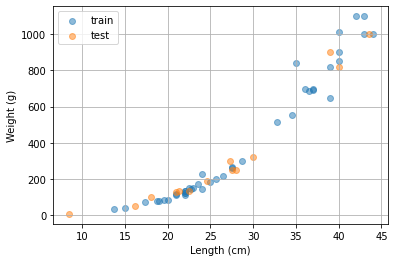

In [12]:
plt.scatter(X_train, y_train, label='train', alpha=0.5)
plt.scatter(X_test, y_test, label='test', alpha=0.5)


plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측.

In [13]:
knn_reg = KNeighborsRegressor() # k=5 인 모델 생성

In [14]:
knn_reg.fit(X_train, y_train) # 모델 학습

KNeighborsRegressor()

In [15]:
# 학습된 훈련 셋의 예측값
train_pred = knn_reg.predict(X_train)
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [16]:
# 훈련 셋의 실젯값(레이블)
y_train

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

* 기호 정의
    * $y_i$: $i$번째 샘플의 실젯값(label)
    * $\hat{y_i}$: $i$번째 샘플의 예측값
    * $\bar{y}$: 타겟의 평균값
    * $n$: 샘플 개수

* MSE(Mean Squared Errors): 오차들의 제곱의 평균
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

* RMSE(Root Mean Squared Errors): MSE의 제곱근
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
$$

* MAE(Mean Absolute Errors): 오차들의 절대값의 평균
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* $R^2$ score(결정 계수, coefficient of determinant)
$$
R^2 = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$

    * 일반적인 평가 지표는 점수가 높을 수록 좋은 모델, 점수가 낮을 수록 나쁜 모델.
    * 그런데, 회귀 문제에서는 오차(MSE, MAE)는 작을 수록 좋은 모델이고, 오차가 클 수록 나쁜 모델.
    * 회귀 문제에서도 점수가 높을 수록 좋은 모델이고 점수가 낮을 수록 나쁜 모델이라고 평가할 수 있는 지표가 필요. --> $R^2$ score(결정 계수)
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측한다면 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값이 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측한다면(즉, 오차가 매우 작다면) 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면 분자 = 분모 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하는 모델이라면(오차가 매우 크다면), 분자 > 분모 일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.
    * 즉, 결정 계수는 1에 가까울 수록 오차가 작은 좋은 예측 모델이고, 숫자가 작아질 수록 오차가 큰 나쁜 예측 모델임.

In [17]:
# 훈련 셋의 MSE, RMSE
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse

60.96323638453089

In [18]:
# 훈련 셋의  MAE
mean_absolute_error(y_train, train_pred)

35.76190476190476

In [19]:
# 테스트 셋의 예측값
test_pred = knn_reg.predict(X_test)
print(test_pred)
print(y_test) # 테스트 셋 실젯값

# 테스트 셋의 RMSE
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]
26.865192562655704


In [20]:
# 훈련 셋의 R^2(결정계수)
train_r2 = r2_score(y_train, train_pred)
print('훈련 셋 R2:', train_r2)

# 테스트 셋의 R^2
test_r2 = r2_score(y_test, test_pred)
print('테스트 셋 R2:', test_r2)

훈련 셋 R2: 0.9698823289099254
테스트 셋 R2: 0.992809406101064


In [21]:
knn_reg.score(X_test, y_test)

0.992809406101064

# 모델 튜닝

k값 변화에 따른 훈련 셋과 테스트 셋에서의 $R^2$ score 변화 시각화

In [35]:
k_values = np.arange(1, 16)
train_scores = [] # 훈련 셋의 R^2 score를 저장할 리스트
test_scores = [] # 테스트 셋의 R^2 score

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k) # KNN 예측기 모델 생성
    knn.fit(X_train, y_train) # 모델 훈련
    train_r2 = knn.score(X_train, y_train) # 훈련 셋에서의 R
    train_scores.append(train_r2)
    test_r2 = knn.score(X_test, y_test)
    test_scores.append(test_r2)

print(train_scores)
print(test_scores)

[0.9852830341215901, 0.9828437127041165, 0.9804899950518966, 0.978211389719245, 0.9698823289099254, 0.9757140960298665, 0.9761170732051527, 0.9697604397763201, 0.9693310367551284, 0.96164569026043, 0.9515761381539326, 0.9467103631225754, 0.9413423450130075, 0.9429470576557883, 0.930201118360776]
[0.991309195814175, 0.9725010241788556, 0.9746459963987609, 0.9840231023848637, 0.992809406101064, 0.9855001139899048, 0.9781383949643516, 0.9780541148735824, 0.9692647749722698, 0.9737908255822255, 0.970279643030474, 0.967703620310643, 0.9639044643206888, 0.9615046463124021, 0.9554827691127018]


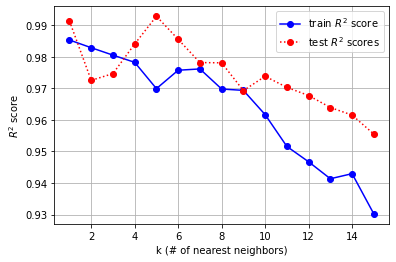

In [36]:
plt.plot(k_values, train_scores, 'bo-', label='train $R^2$ score')
plt.plot(k_values, test_scores, 'ro:', label='test $R^2$ scores')

plt.grid()
plt.xlabel('k (# of nearest neighbors)')
plt.ylabel('$R^2$ score')
plt.legend()
plt.show()